<a href="https://colab.research.google.com/github/hyoungsin/project/blob/main/big_ml_study_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ★ 요약 정리 
 - 회귀평가를 위한 사이킷런 AP와 유의사항 ~ 로지스틱 회귀의 이해

##1 사이킷런 회귀평가 API

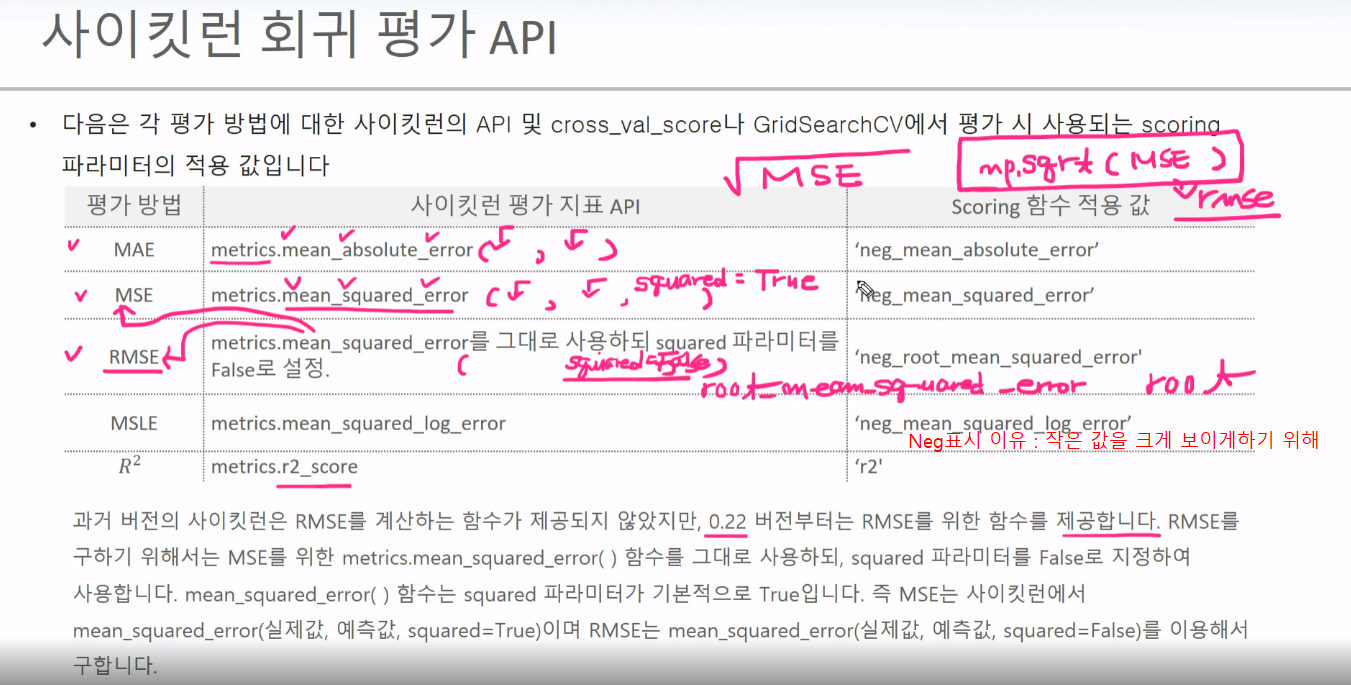

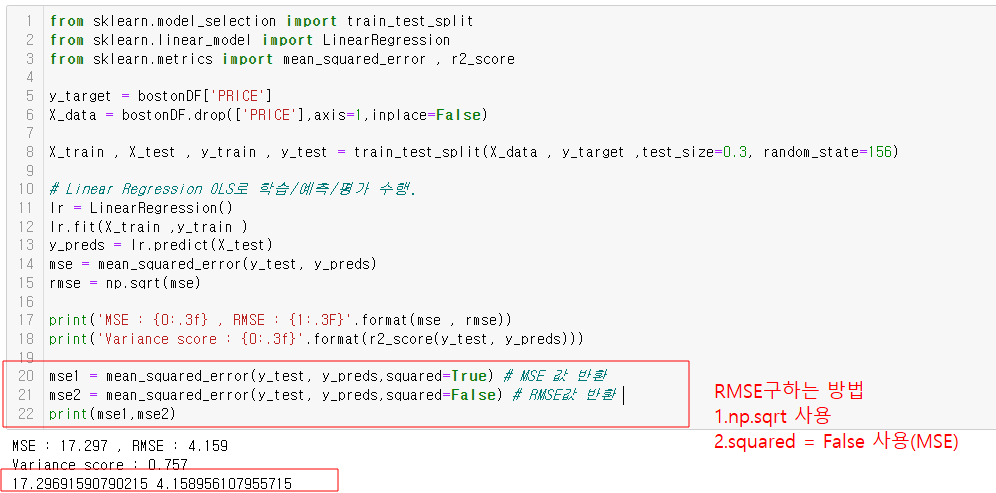

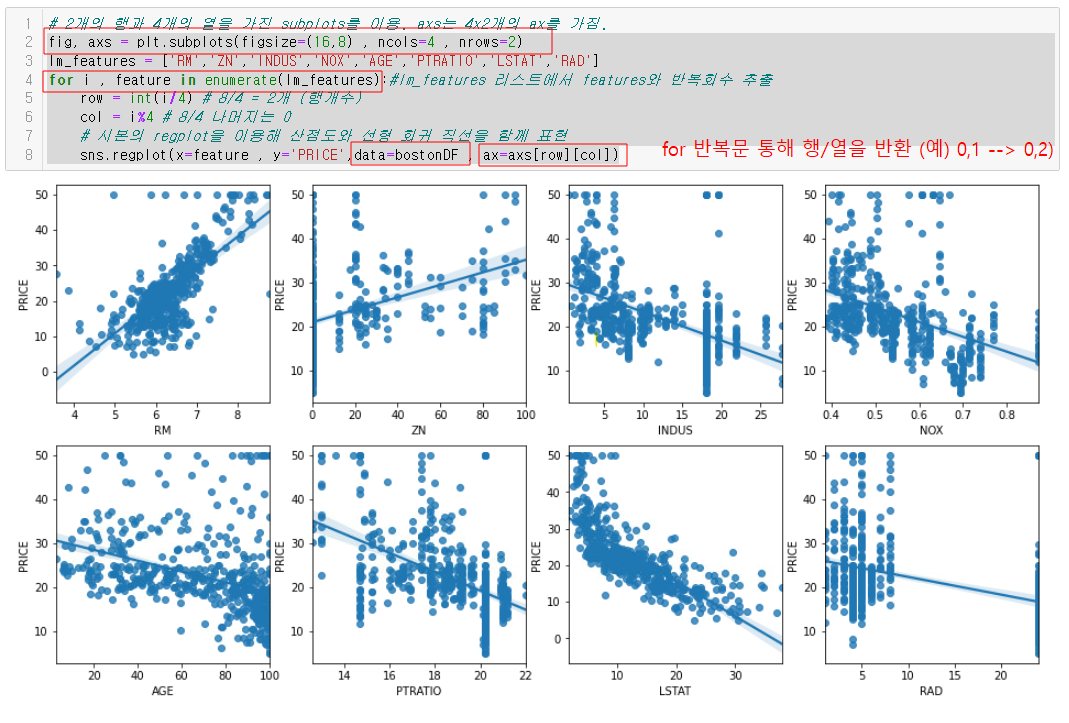

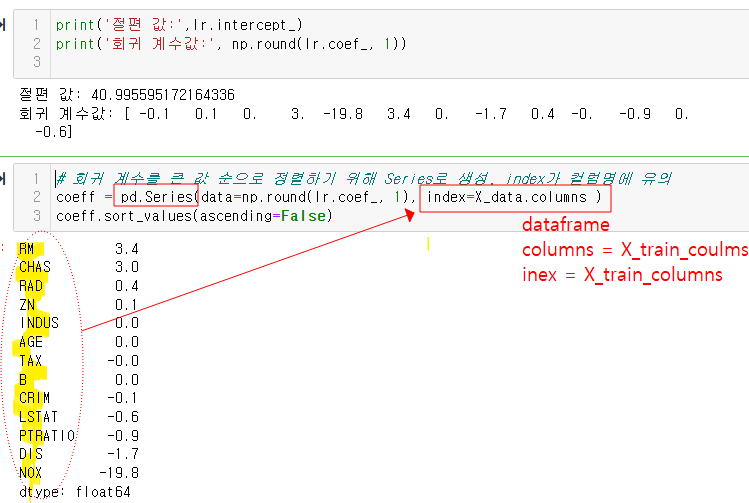

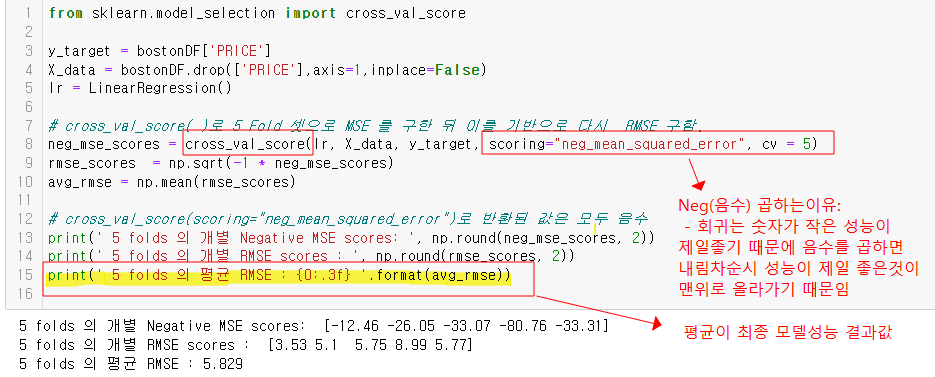

## 2.다항회귀 

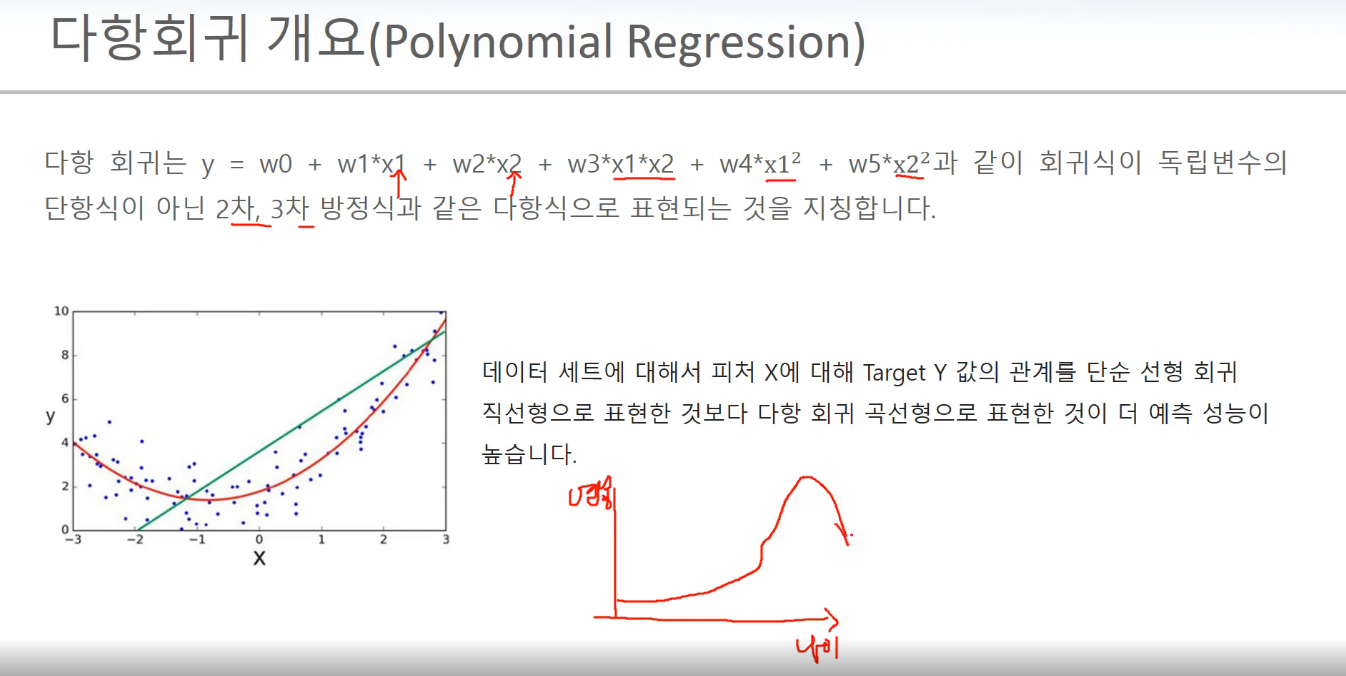

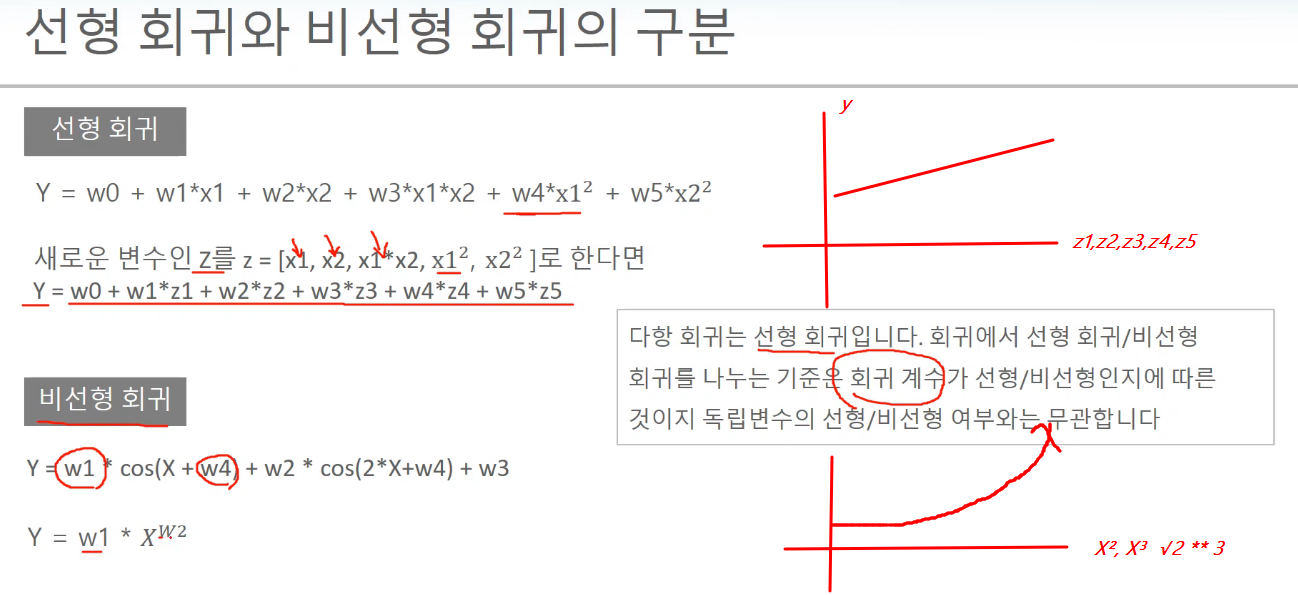

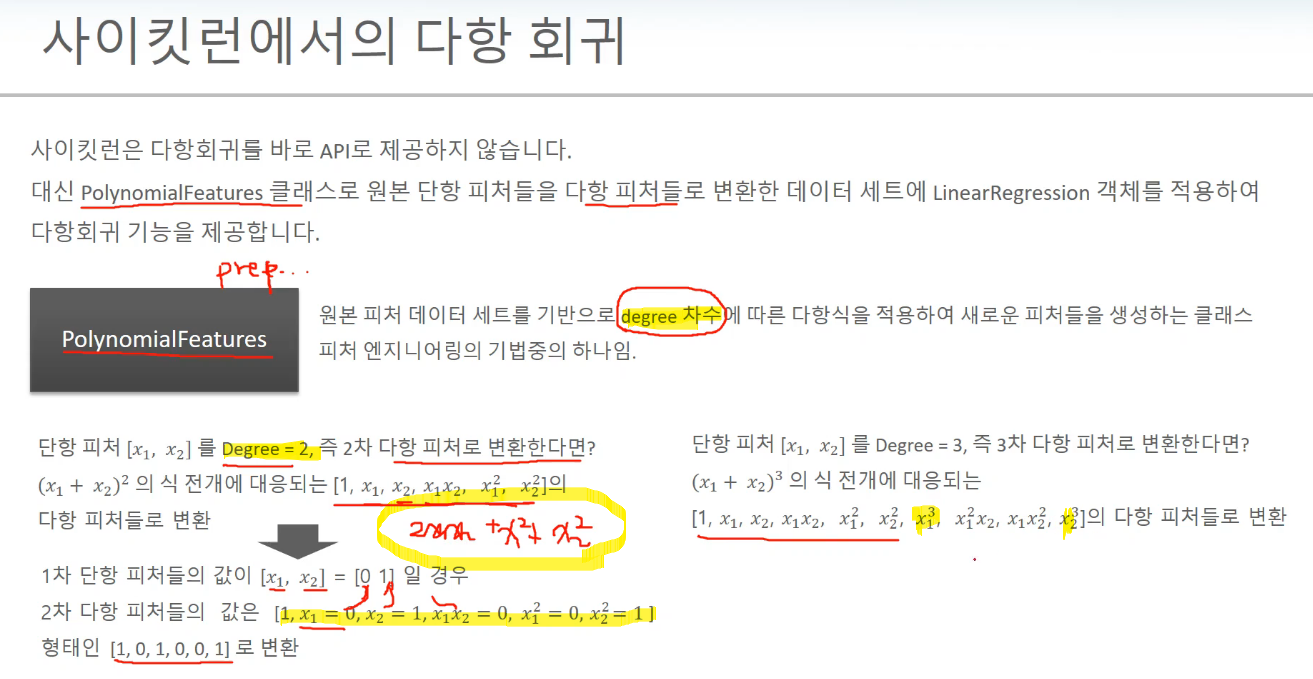

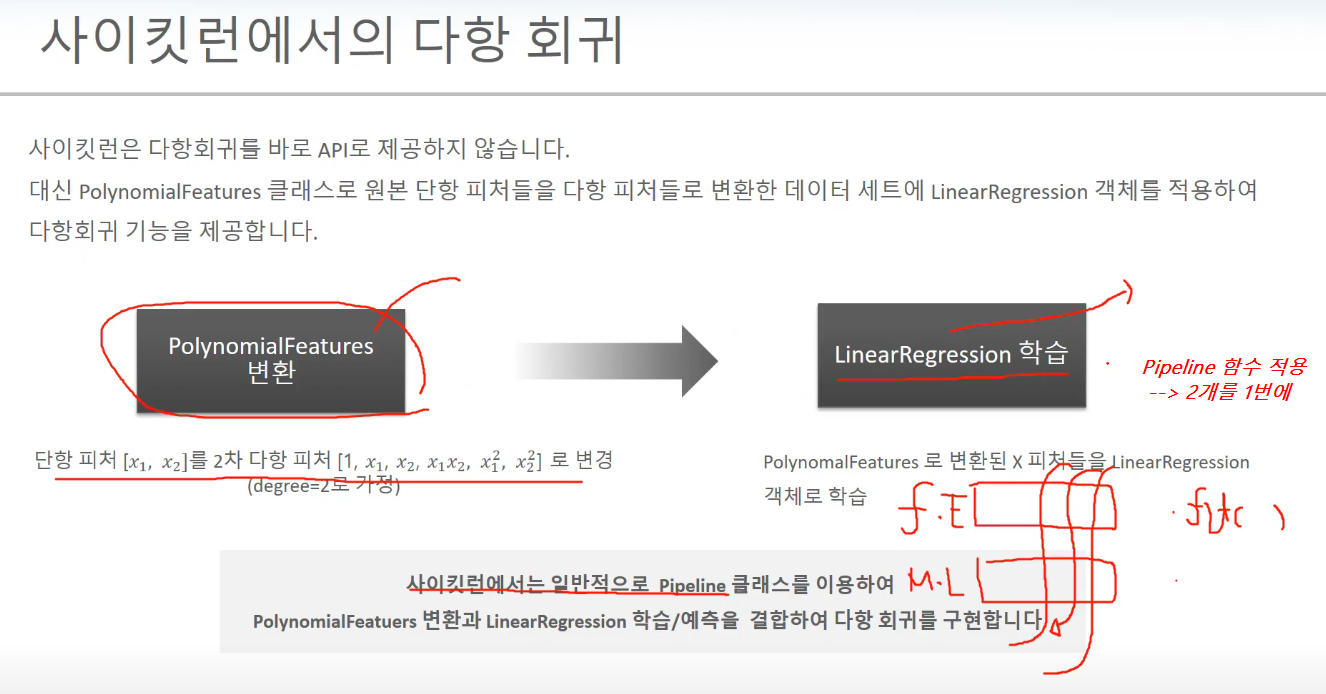

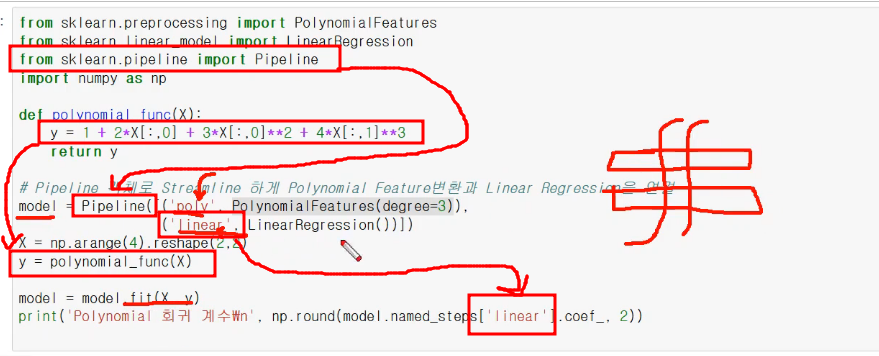

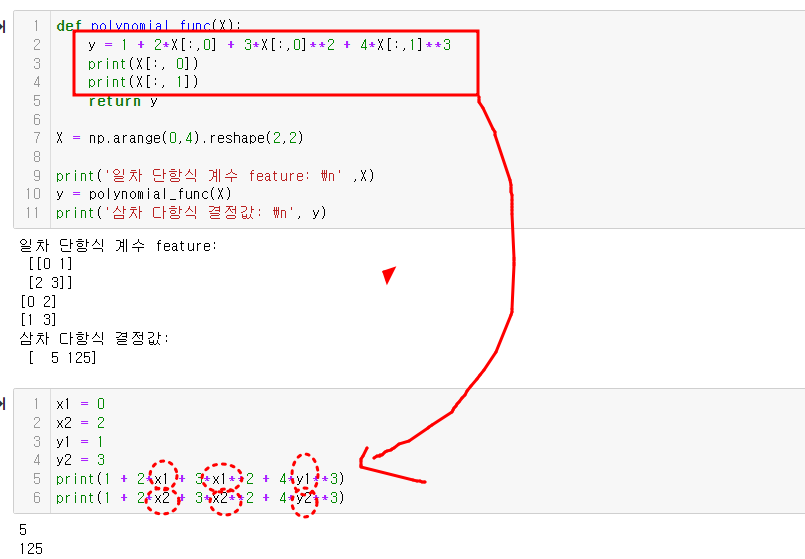

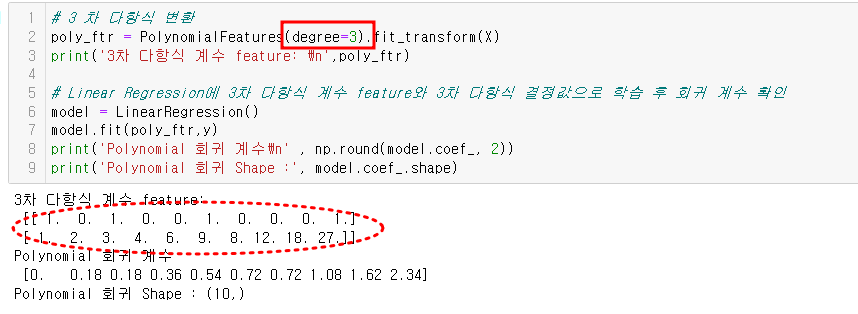

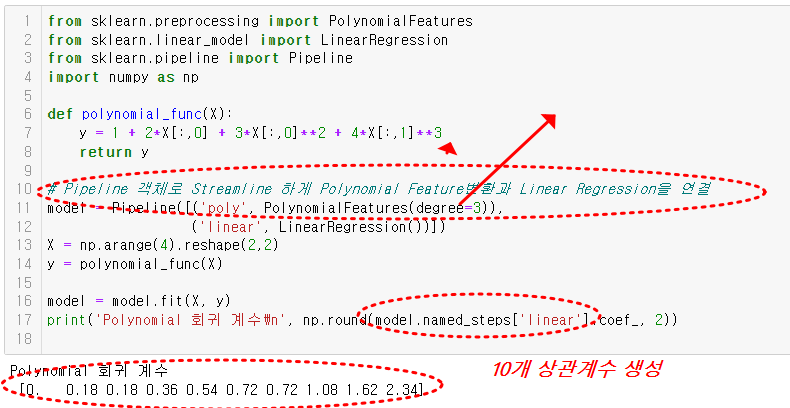

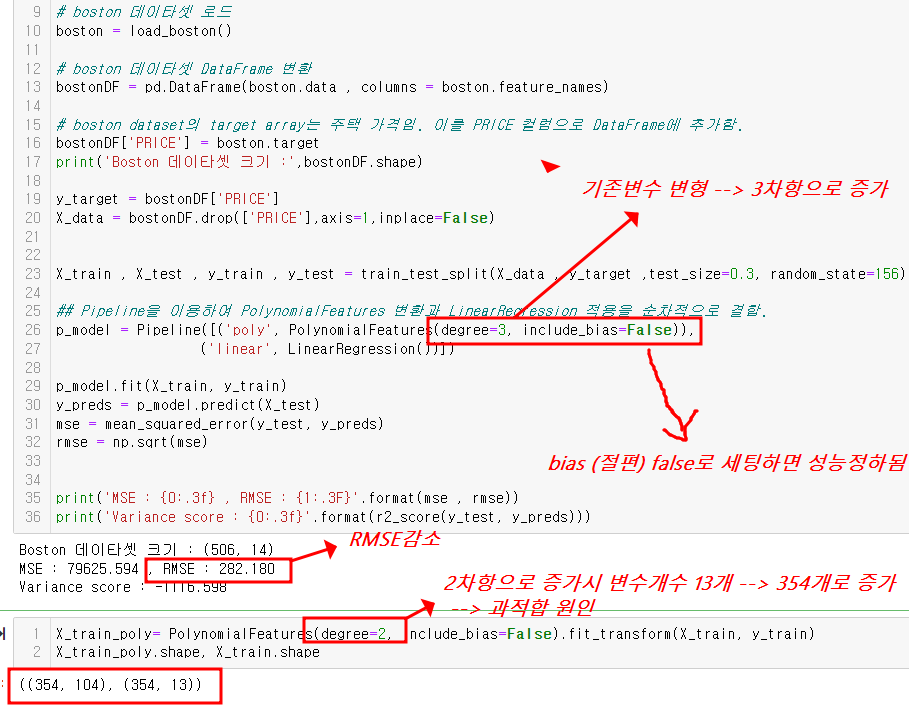

# ★ 코딩 실습

##1 사이킷런 회귀평가 API 
 - LinearRegression을 주택 가격 예측

In [ ]:
#1.Dataset구성

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings('ignore')  #사이킷런 1.2 부터는 보스턴 주택가격 데이터가 없어진다는 warning 메시지 출력 제거 (현재 Version1.1)
%matplotlib inline

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)
bostonDF.head()

Boston 데이타셋 크기 : (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


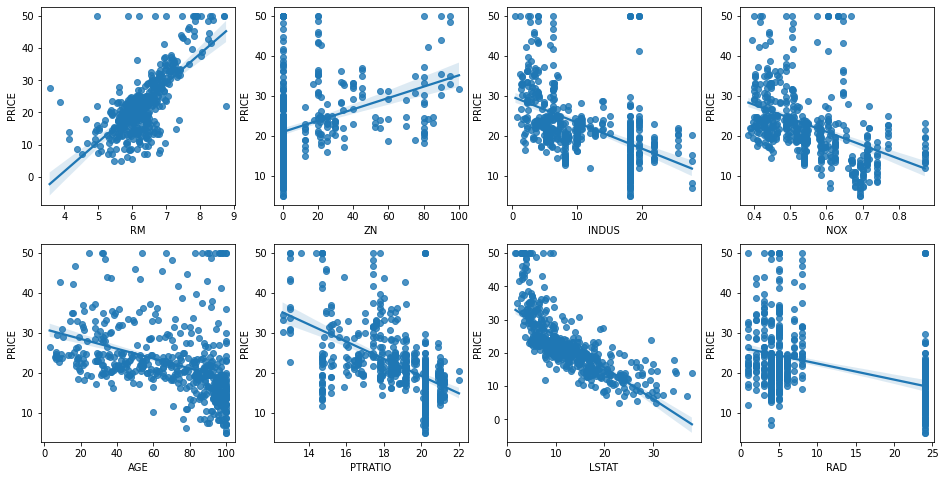

In [ ]:
#2.13개 변수중 8개 변수의 회귀계수 그래프 그리기 

fig, axs = plt.subplots(figsize=(16,8) , ncols=4 , nrows=2) #  2개의 행과 4개의 열을 가진 subplots를 이용. axs는 4x2개의 ax를 가짐.
lm_features = ['RM','ZN','INDUS','NOX','AGE','PTRATIO','LSTAT','RAD']
for i , feature in enumerate(lm_features):#lm_features 리스트에서 features와 반복회수 추출
    row = int(i/4) # 8/4 = 2개 (행개수)
    col = i%4 # 8/4 나머지는 0
    # 시본의 regplot을 이용해 산점도와 선형 회귀 직선을 함께 표현
    sns.regplot(x=feature , y='PRICE',data=bostonDF , ax=axs[row][col])

In [ ]:
#3. Logistic Regression 적용한 회귀모델 평가 (MSE & RMSE) --> 4.159

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)

X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

# Linear Regression OLS로 학습/예측/평가 수행. 
lr = LinearRegression()
lr.fit(X_train ,y_train )
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)

print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

mse1 = mean_squared_error(y_test, y_preds,squared=True) # MSE 값 반환
mse2 = mean_squared_error(y_test, y_preds,squared=False) # RMSE값 반환 
print(mse1,mse2)

MSE : 17.297 , RMSE : 4.159
Variance score : 0.757
17.296915907902022 4.158956107955699


In [ ]:
#4. 회귀 계수 산출 및  정렬( 큰 값 순으로 정렬하기 위해 Series로 생성. index가 컬럼명에 유의)

coeff = pd.Series(data=np.round(lr.coef_, 1), index=X_data.columns )
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

## 2.다항회귀 

In [ ]:
#5. 단항식 --> 다항식 변형 (y = 2x, y = 2x + x²+ x³)

from sklearn.preprocessing import PolynomialFeatures # n차단항식 수식 산출 
import numpy as np

# 다항식으로 변환한 단항식 생성, [[0,1],[2,3]]의 2X2 행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X )

# degree = 2 인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용하여 변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print('변환된 2차 다항식 계수 feature:\n', poly_ftr)


일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 feature:
 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [ ]:
#6. 단항식 --> 3차 다항식 변형 (y = 2x, y = 2x + 2x³)

def polynomial_func(X):
    y = 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    print(X[:, 0])
    print(X[:, 1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature: \n' ,X)
y = polynomial_func(X)
print('삼차 다항식 결정값: \n', y)

x1 = 0
x2 = 2
y1 = 1
y2 = 3
print(1 + 2*x1 + 3*x1**2 + 4*y1**3)
print(1 + 2*x2 + 3*x2**2 + 4*y2**3)

일차 단항식 계수 feature: 
 [[0 1]
 [2 3]]
[0 2]
[1 3]
삼차 다항식 결정값: 
 [  5 125]
5
125


In [ ]:
#7.pipeline활용한 3차 다항식 모델 생성 (PolynomiaFeatures & LinearRegression)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np

# boston 데이타셋 로드
boston = load_boston()

# boston 데이타셋 DataFrame 변환 
bostonDF = pd.DataFrame(boston.data , columns = boston.feature_names)

# boston dataset의 target array는 주택 가격임. 이를 PRICE 컬럼으로 DataFrame에 추가함. 
bostonDF['PRICE'] = boston.target
print('Boston 데이타셋 크기 :',bostonDF.shape)

y_target = bostonDF['PRICE']
X_data = bostonDF.drop(['PRICE'],axis=1,inplace=False)


X_train , X_test , y_train , y_test = train_test_split(X_data , y_target ,test_size=0.3, random_state=156)

## Pipeline을 이용하여 PolynomialFeatures 변환과 LinearRegression 적용을 순차적으로 결합. 
p_model = Pipeline([('poly', PolynomialFeatures(degree=3, include_bias=False)),
                  ('linear', LinearRegression())])

p_model.fit(X_train, y_train)
y_preds = p_model.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)


print('MSE : {0:.3f} , RMSE : {1:.3F}'.format(mse , rmse))
print('Variance score : {0:.3f}'.format(r2_score(y_test, y_preds)))

X_train_poly= PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train, y_train)
print('기존변수 train data 변수형태\n',X_train.shape, '\n ploy활용 train data 변수형태\n',X_train_poly.shape,)


Boston 데이타셋 크기 : (506, 14)
MSE : 79625.595 , RMSE : 282.180
Variance score : -1116.598
기존변수 train data 변수형태
 (354, 13) 
 ploy활용 train data 변수형태
 (354, 104)
